In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LinReg  
from sklearn.linear_model import Lasso       
from sklearn.linear_model import Ridge      
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR


In [2]:
#%pip install lazypredict

In [3]:
"""%pip install xgboost

%pip install catboost

%pip install lightgbm"""

'%pip install xgboost\n\n%pip install catboost\n\n%pip install lightgbm'

In [4]:
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
from lazypredict.Supervised import LazyRegressor 

In [5]:
mad_total = pd.read_csv('../analisis_exploratorio/mad_total_limp.csv')

In [6]:
mad_centro = pd.read_csv('../analisis_exploratorio/mad_int_limp.csv')

In [7]:
mad_exterior = pd.read_csv('../analisis_exploratorio/mad_ext_limp.csv')

In [8]:
alquiler = pd.read_csv('../analisis_exploratorio/alquiler_limp.csv')

In [9]:
mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq,pais,ciudad
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77,1022.74,españa,madrid
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77,1022.74,españa,madrid
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77,1022.74,españa,madrid
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77,1022.74,españa,madrid
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77,1022.74,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35779,1,exterior,sureste,1400000,805,12,-4,2,2,1739.13,1291.27,1140.37,españa,madrid
35780,1,exterior,sureste,1400000,950,10,-4,2,2,1473.68,1291.27,1140.37,españa,madrid
35781,1,exterior,sureste,1500000,500,5,-4,2,2,3000.00,1291.27,1140.37,españa,madrid
35782,1,exterior,sureste,2000000,3000,1,-4,2,2,666.67,1291.27,1140.37,españa,madrid


In [10]:
modelo_num = mad_total.drop(columns=['distrito_€/m2','€/m2','zona','distrito'])

In [11]:
modelo = mad_total.drop(columns=['distrito_€/m2','€/m2'])

In [12]:
"""plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(modelo_num.corr(method='spearman'), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(modelo_num.corr(method='spearman'),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});"""

"plt.figure(figsize=(15, 10))\n\nsns.set(style='white')\n\nmask=np.triu(np.ones_like(modelo_num.corr(method='spearman'), dtype=bool))\n\ncmap=sns.diverging_palette(0, 10, as_cmap=True)\n\n\nsns.heatmap(modelo_num.corr(method='spearman'),\n           mask=mask,\n          cmap=cmap,\n          center=0,\n          square=True,\n          annot=True,\n          linewidths=0.5,\n          cbar_kws={'shrink': 0.5});"

In [13]:
X = modelo.drop('precio', axis=1)

y = modelo.precio

In [14]:
X = X.drop(columns=['media_alq','caract'])

In [15]:
X_train, X_test, y_train, y_test = tts(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28627, 9), (7157, 9), (28627,), (7157,))

In [16]:
"""from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)"""

'from lazypredict.Supervised import LazyRegressor\n\nreg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)\n\nmodels, predictions = reg.fit(X_train, X_test, y_train, y_test)\n\nprint(models)'

In [17]:
X = pd.get_dummies(X, columns=['zona'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['zona'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['zona'], dtype=int, drop_first=True)

In [18]:
X = pd.get_dummies(X, columns=['distrito'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['distrito'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['distrito'], dtype=int, drop_first=True)

In [19]:
X_train

,descripcion,superficie,habitaciones,plantas,ascensor,pais,ciudad,zona_exterior,distrito_barajas,distrito_barrio de salamanca,distrito_carabanchel,distrito_centro,distrito_chamartin,distrito_chamberi,distrito_ciudad lineal,distrito_corredor de henares,distrito_fuencarral,distrito_hortaleza,distrito_latina,distrito_moncloa,distrito_moratalaz,distrito_noroeste,distrito_norte,distrito_puente de vallecas,distrito_retiro,distrito_san blas,distrito_sur,distrito_sureste,distrito_suroeste,distrito_tetuan,distrito_usera,distrito_vicalvaro,distrito_villa de vallecas,distrito_villaverde
24788,1,220,3,-4,2,españa,madrid,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8023,0,51,2,-2,0,españa,madrid,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31702,0,112,3,3,1,españa,madrid,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
35765,1,1000,7,-4,2,españa,madrid,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31782,0,107,4,2,1,españa,madrid,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,139,5,8,1,españa,madrid,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6265,0,100,3,7,1,españa,madrid,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11284,0,110,4,2,1,españa,madrid,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,0,67,2,0,0,españa,madrid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
from sklearn.metrics import mean_squared_error as mse

In [21]:
mad_total.distrito.value_counts()

distrito
noroeste               4792
sur                    4205
norte                  3640
centro                 2826
corredor de henares    2355
barrio de salamanca    2272
sureste                1771
suroeste               1197
chamberi               1132
tetuan                 1077
chamartin               969
ciudad lineal           900
carabanchel             891
moncloa                 887
puente de vallecas      847
hortaleza               827
fuencarral              763
san blas                680
arganzuela              674
retiro                  655
latina                  562
villaverde              507
usera                   357
vicalvaro               349
villa de vallecas       341
moratalaz               164
barajas                 144
Name: count, dtype: int64

In [22]:
df1 = mad_total[mad_total['distrito']=='san blas']

In [23]:
df1

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq,pais,ciudad
2632,0,central,san blas,79768,75,3,-3,1,0,1063.57,3203.42,1209.01,españa,madrid
2633,0,central,san blas,80300,52,2,0,1,0,1544.23,3203.42,1209.01,españa,madrid
2634,0,central,san blas,81800,60,3,3,3,0,1363.33,3203.42,1209.01,españa,madrid
2635,0,central,san blas,83200,48,3,-3,1,0,1733.33,3203.42,1209.01,españa,madrid
2636,0,central,san blas,84990,58,2,2,1,0,1465.34,3203.42,1209.01,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,1,central,san blas,1380000,375,8,-4,2,2,3680.00,3203.42,1209.01,españa,madrid
3308,1,central,san blas,1399900,282,4,-4,2,2,4964.18,3203.42,1209.01,españa,madrid
3309,3,central,san blas,1425000,240,6,1,1,1,5937.50,3203.42,1209.01,españa,madrid
3310,1,central,san blas,1500000,379,5,-4,2,2,3957.78,3203.42,1209.01,españa,madrid


In [24]:
#df1[df1['precio']>800000]

In [25]:
df1.precio.describe()

count       680.00
mean     338718.83
std      275663.07
min       79768.00
25%      175000.00
50%      249000.00
75%      375000.00
max     1950000.00
Name: precio, dtype: float64

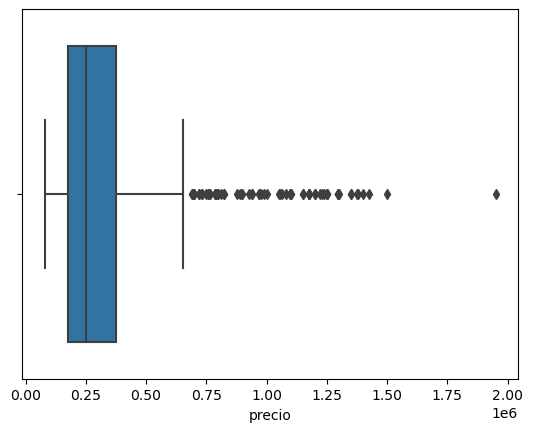

In [26]:
sns.boxplot(x=df1['precio'])
plt.show()

In [27]:
#df1 = df1[df1['precio']<2000000]

In [28]:
df1.shape

(680, 14)

In [29]:
df1.sort_values(by='precio')

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq,pais,ciudad
2632,0,central,san blas,79768,75,3,-3,1,0,1063.57,3203.42,1209.01,españa,madrid
2633,0,central,san blas,80300,52,2,0,1,0,1544.23,3203.42,1209.01,españa,madrid
2634,0,central,san blas,81800,60,3,3,3,0,1363.33,3203.42,1209.01,españa,madrid
2635,0,central,san blas,83200,48,3,-3,1,0,1733.33,3203.42,1209.01,españa,madrid
2636,0,central,san blas,84990,58,2,2,1,0,1465.34,3203.42,1209.01,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,1,central,san blas,1380000,375,8,-4,2,2,3680.00,3203.42,1209.01,españa,madrid
3308,1,central,san blas,1399900,282,4,-4,2,2,4964.18,3203.42,1209.01,españa,madrid
3309,3,central,san blas,1425000,240,6,1,1,1,5937.50,3203.42,1209.01,españa,madrid
3310,1,central,san blas,1500000,379,5,-4,2,2,3957.78,3203.42,1209.01,españa,madrid


In [30]:
df1

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq,pais,ciudad
2632,0,central,san blas,79768,75,3,-3,1,0,1063.57,3203.42,1209.01,españa,madrid
2633,0,central,san blas,80300,52,2,0,1,0,1544.23,3203.42,1209.01,españa,madrid
2634,0,central,san blas,81800,60,3,3,3,0,1363.33,3203.42,1209.01,españa,madrid
2635,0,central,san blas,83200,48,3,-3,1,0,1733.33,3203.42,1209.01,españa,madrid
2636,0,central,san blas,84990,58,2,2,1,0,1465.34,3203.42,1209.01,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,1,central,san blas,1380000,375,8,-4,2,2,3680.00,3203.42,1209.01,españa,madrid
3308,1,central,san blas,1399900,282,4,-4,2,2,4964.18,3203.42,1209.01,españa,madrid
3309,3,central,san blas,1425000,240,6,1,1,1,5937.50,3203.42,1209.01,españa,madrid
3310,1,central,san blas,1500000,379,5,-4,2,2,3957.78,3203.42,1209.01,españa,madrid


In [31]:
df1.precio.describe()

count       680.00
mean     338718.83
std      275663.07
min       79768.00
25%      175000.00
50%      249000.00
75%      375000.00
max     1950000.00
Name: precio, dtype: float64

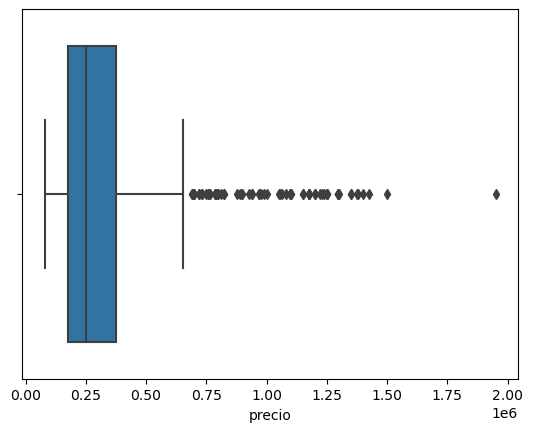

In [32]:
sns.boxplot(x=df1['precio'])
plt.show()

In [33]:
"""def remove_outliers(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return data[~((data < lower_bound) | (data > upper_bound))].dropna()
df1['precio'] = remove_outliers(df1['precio'])
df1 = df1.dropna()"""

"def remove_outliers(data, threshold=1.5):\n    q1 = data.quantile(0.25)\n    q3 = data.quantile(0.75)\n    iqr = q3 - q1\n    lower_bound = q1 - threshold * iqr\n    upper_bound = q3 + threshold * iqr\n    return data[~((data < lower_bound) | (data > upper_bound))].dropna()\ndf1['precio'] = remove_outliers(df1['precio'])\ndf1 = df1.dropna()"

In [34]:
df1.shape

(680, 14)

In [35]:
df1 = df1.drop(columns=['distrito_€/m2','€/m2','zona','distrito','media_alq','pais','ciudad'])

In [36]:
X = df1.drop('precio', axis=1)

y = df1.precio

In [37]:
#X = X.drop(columns=['zona','distrito','media_alq'])

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
"""scaler = StandardScaler()

X[['descripcion', 'superficie', 'habitaciones',
   'plantas', 'caract', 'ascensor']] = scaler.fit_transform(X[['descripcion', 'superficie', 'habitaciones',
                                                               'plantas', 'caract', 'ascensor']])"""

"scaler = StandardScaler()\n\nX[['descripcion', 'superficie', 'habitaciones',\n   'plantas', 'caract', 'ascensor']] = scaler.fit_transform(X[['descripcion', 'superficie', 'habitaciones',\n                                                               'plantas', 'caract', 'ascensor']])"

In [40]:
X_train, X_test, y_train, y_test = tts(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((544, 6), (136, 6), (544,), (136,))

In [41]:
"""plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(X.corr(method='spearman'), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(X.corr(method='spearman'),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});"""

"plt.figure(figsize=(15, 10))\n\nsns.set(style='white')\n\nmask=np.triu(np.ones_like(X.corr(method='spearman'), dtype=bool))\n\ncmap=sns.diverging_palette(0, 10, as_cmap=True)\n\n\nsns.heatmap(X.corr(method='spearman'),\n           mask=mask,\n          cmap=cmap,\n          center=0,\n          square=True,\n          annot=True,\n          linewidths=0.5,\n          cbar_kws={'shrink': 0.5});"

In [42]:
"""xgbr=XGBR(random_state=42)

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)"""

'xgbr=XGBR(random_state=42)\n\nxgbr.fit(X_train, y_train)\n\ny_pred = xgbr.predict(X_test)\n\nmse(y_test, y_pred, squared=False)'

In [43]:
#print(f"Test accuracy: {xgbr.score(X_test, y_test):0.4f}")

In [44]:
#mse(y_test, y_pred, squared=False)*100/df1.precio.mean()

In [45]:
#dict(zip(X.columns, xgbr.feature_importances_*100))

In [46]:
X1 = df1.drop(columns='precio')
y1 = df1.precio

In [47]:
xgbr=XGBR(random_state=42)
xgbr.fit(X1, y1)
y1_pred = xgbr.predict(X1)
mse(y1_pred, y1, squared=False)

20974.338214225565

In [48]:
dict(zip(X.columns, xgbr.feature_importances_*100))

{'descripcion': 21.728617,
 'superficie': 49.39507,
 'habitaciones': 13.055838,
 'plantas': 3.3434515,
 'caract': 1.9224015,
 'ascensor': 10.554618}

In [49]:
df1.precio.mean()

338718.8279411765

In [50]:
print(f"Test accuracy: {xgbr.score(X1, y1):0.4f}")

Test accuracy: 0.9942


In [51]:
mse(y1_pred, y1, squared=False)*100/df1.precio.mean()

6.192256374324744

In [52]:
"""rfr=RFR(random_state=42)
rfr.fit(X1, y1)
y1_pred = rfr.predict(X1)
mse(y1_pred, y1, squared=False)"""

'rfr=RFR(random_state=42)\nrfr.fit(X1, y1)\ny1_pred = rfr.predict(X1)\nmse(y1_pred, y1, squared=False)'

In [53]:
#dict(zip(X.columns, rfr.feature_importances_*100))

In [54]:
#print(f"Test accuracy: {rfr.score(X1, y1):0.4f}")

In [55]:
#mse(y1_pred, y1, squared=False)*100/df1.precio.mean()

In [56]:
y1 = pd.DataFrame(y1)

In [57]:
y1

,precio
2632,79768
2633,80300
2634,81800
2635,83200
2636,84990
...,...
3307,1380000
3308,1399900
3309,1425000
3310,1500000


In [58]:
y1_pred

array([  96286.05 ,  113381.19 ,   94621.87 ,   86656.66 ,  117197.945,
        117197.945,   83966.03 ,  117299.41 ,   88917.25 ,  109478.75 ,
        119110.7  ,   98730.72 ,  113801.945,   97801.98 ,   95638.38 ,
         94025.945,   95744.8  ,   96715.57 ,  102706.984,  100741.59 ,
        118122.97 ,  109113.875,  110638.67 ,  134406.34 ,  121439.22 ,
        126350.66 ,  119617.31 ,  118122.97 ,  121368.28 ,  120462.76 ,
        126763.45 ,  119714.055,  118786.78 ,  118038.08 ,  118786.78 ,
        118786.78 ,  126763.45 ,  136603.58 ,  129922.36 ,  137270.33 ,
        124170.92 ,  120793.87 ,  121975.13 ,  135570.4  ,  135570.4  ,
        123266.39 ,  122834.96 ,  130683.41 ,  143083.92 ,  118132.03 ,
        119631.04 ,  129639.98 ,  129079.91 ,  120153.71 ,  126188.11 ,
        129327.73 ,  119329.67 ,  132224.   ,  129112.516,  125427.17 ,
        121427.03 ,  131997.78 ,  119727.09 ,  125937.39 ,  128016.13 ,
        135159.2  ,  141173.86 ,  135591.62 ,  129471.98 ,  1300

In [59]:
y1_pred = pd.DataFrame(y1_pred, columns=['prediccion'])

In [60]:
y1 = y1.reset_index(drop=True)
y1_pred = y1_pred.reset_index(drop=True)

In [61]:
con = pd.concat([y1,y1_pred], axis=1)

In [62]:
con

,precio,prediccion
0,79768,96286.05
1,80300,113381.19
2,81800,94621.87
3,83200,86656.66
4,84990,117197.95
...,...,...
675,1380000,1380429.25
676,1399900,1377685.25
677,1425000,1402506.38
678,1500000,1491259.12


In [63]:
con['dif'] = abs(con['precio'] - con['prediccion'])

con['porcen'] = con['dif']*100/ con['precio']

con['porcen'].mean()

5.311954201188581

In [64]:
con.head(100)

,precio,prediccion,dif,porcen
0,79768,96286.05,16518.05,20.71
1,80300,113381.19,33081.19,41.20
2,81800,94621.87,12821.87,15.67
3,83200,86656.66,3456.66,4.15
4,84990,117197.95,32207.95,37.90
5,85000,117197.95,32197.95,37.88
6,85072,83966.03,1105.97,1.30
7,88000,117299.41,29299.41,33.29
8,89119,88917.25,201.75,0.23
9,89990,109478.75,19488.75,21.66


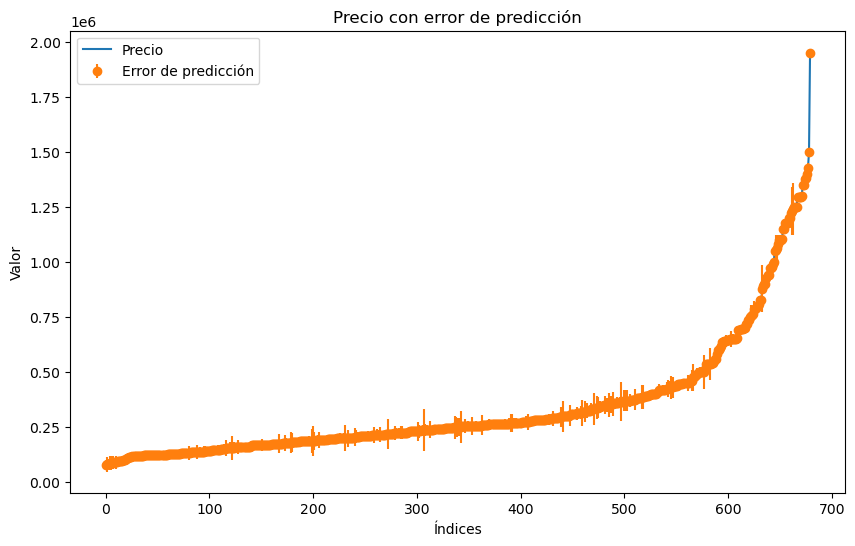

In [65]:
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico
plt.plot(con.index, con['precio'], label='Precio')  # Línea del precio

# Dibujar el error absoluto alrededor de la línea del precio
plt.errorbar(con.index, con['precio'], yerr=con['dif'], fmt='o', label='Error de predicción')

plt.xlabel('Índices')  # Etiqueta del eje x
plt.ylabel('Valor')  # Etiqueta del eje y
plt.title('Precio con error de predicción')  # Título del gráfico
plt.legend()  # Mostrar leyenda
plt.show()

In [66]:
con2 = con[(con['precio']>100000) & (con['precio']<200000)]

In [67]:
con2

,precio,prediccion,dif,porcen
18,100400,102706.98,2306.98,2.30
19,100400,100741.59,341.59,0.34
20,105000,118122.97,13122.97,12.50
21,107870,109113.88,1243.88,1.15
22,108000,110638.67,2638.67,2.44
...,...,...,...,...
227,199400,205218.14,5818.14,2.92
228,199900,201269.38,1369.38,0.69
229,199900,202105.39,2205.39,1.10
230,199995,175484.88,24510.12,12.26


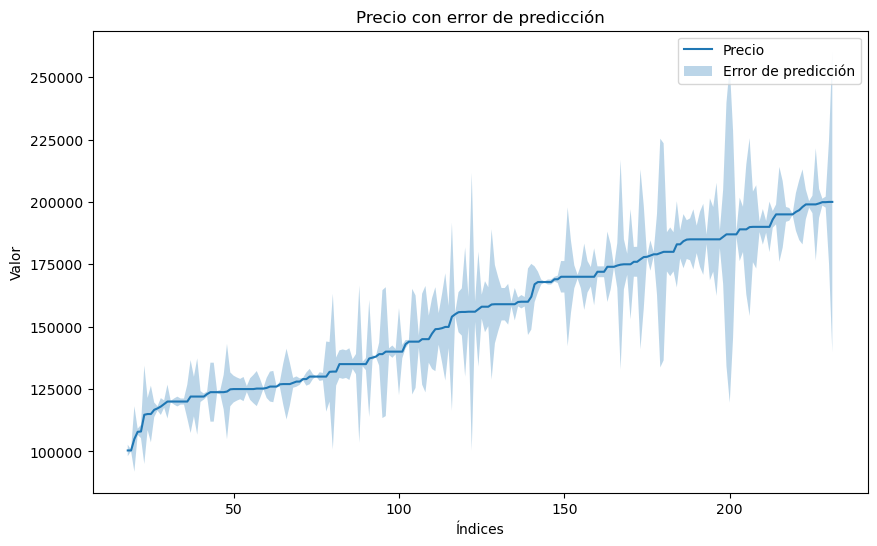

In [68]:
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico

# Dibujar la línea de precio
plt.plot(con2.index, con2['precio'], label='Precio')

# Dibujar el error como una línea que une los errores por arriba como por abajo
plt.fill_between(con2.index, con2['precio'] + con2['dif'], con2['precio'] - con2['dif'], alpha=0.3, label='Error de predicción')

plt.xlabel('Índices')  # Etiqueta del eje x
plt.ylabel('Valor')  # Etiqueta del eje y
plt.title('Precio con error de predicción')  # Título del gráfico
plt.legend()  # Mostrar leyenda
plt.show()

In [69]:
alquiler

,descripcion,zona,Distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq,pais,ciudad
0,4,central,Arganzuela,600.00,25,0,3,3,3,0,24.00,21.04,1530.95,españa,madrid
1,0,central,Arganzuela,700.00,35,2,0,1,0,0,20.00,21.04,1530.95,españa,madrid
2,0,central,Arganzuela,790.00,40,1,1,0,1,0,19.75,21.04,1530.95,españa,madrid
3,4,central,Arganzuela,800.00,40,0,3,3,3,0,20.00,21.04,1530.95,españa,madrid
4,0,central,Arganzuela,800.00,35,1,4,0,1,0,22.86,21.04,1530.95,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,Villaverde,1465.00,45,1,6,1,1,0,32.56,15.34,1022.74,españa,madrid
8178,3,central,Villaverde,1475.00,64,2,5,1,1,0,23.05,15.34,1022.74,españa,madrid
8179,0,central,Villaverde,1500.00,90,4,6,1,1,0,16.67,15.34,1022.74,españa,madrid
8180,0,central,Villaverde,1895.00,80,2,0,1,1,0,23.69,15.34,1022.74,españa,madrid


In [70]:
con.to_excel('san_blas_tasacion_compra.xlsx', index=False)